In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U segmentation-models

In [3]:
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
from keras.models import *
from google.colab import drive
from keras import backend as K
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [5]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
tf.keras.backend.clear_session()

In [6]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [7]:
metrics = ["accuracy", jaccard_coef]

In [8]:
saved_model = load_model('/content/drive/MyDrive/trained_model_50/satellite_segmentation_full.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss,
                                          'jaccard_coef': jaccard_coef}))

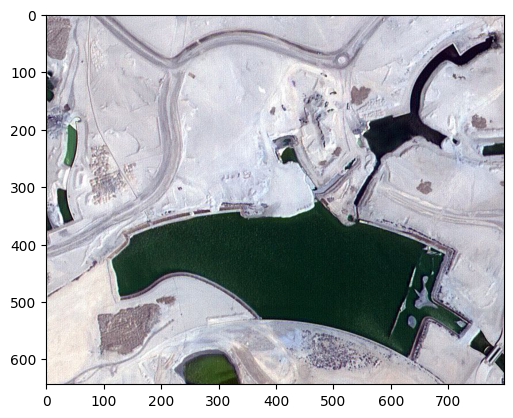

In [9]:
plt.imshow(Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/images/image_part_002.jpg'))

In [10]:
image =Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/images/image_part_002.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [11]:
prediction = saved_model.predict(image)

1/1 [==============================] - 1s 751ms/step


In [12]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

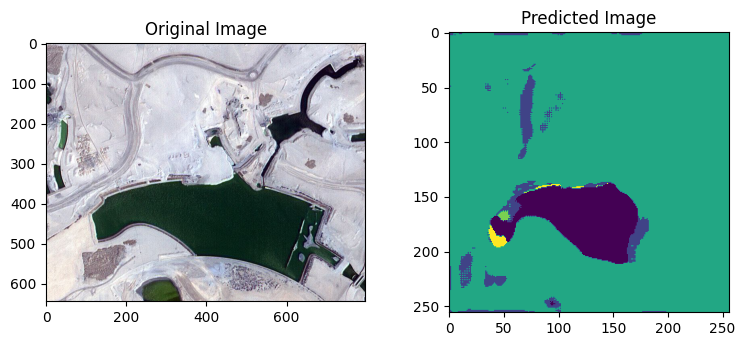

In [13]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/images/image_part_002.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)